### What is Feature Selection

Feature Selection is the process used to select the input variables that are most important to your Machine Learning task.

In a Supervised Learning task, your task is to predict an output variable and in some cases, you are limited with a few input variables to work with, but sometimes you will have access to a whole set of potential predictors or variables. 
In this case, it can often be harmful to use all of these input variables or predictors in to your model. This is where feature selection comes in.

### Why use Feature Selection

1. Improve Model Accuracy
2. Lower Computational Cost
3. Easier to Understand & Explain


### Ways to conduct Feature Selection



### 1 . Chi-Square (Categorical attributes)

* Chi-square will be useful if we are dealing with categorical attributes 
* It doesn't support contineous values 


### What is the goal ?

* The goal is to find predictive power of independent variable with respect to target variable using chi square test in Python.

### When to use Chi Square ?

* When we are dealing with the classification problems 
* When we have both the independent and dependent varaibles as categories then we can use Chi Square test to find significant features for our model.

In [2]:
import pandas as pd
from sklearn.feature_selection import chi2   # calculate the chi square test 

In [3]:
df = pd.read_csv('chi_square_data.csv')
df.head(3)

,MSZoning,Street,LotShape,LandContour,Utilities
0,RL,Pave,Reg,Lvl,AllPub
1,RL,Pave,Reg,Lvl,AllPub
2,RL,Pave,IR1,Lvl,AllPub


#### Now we are going to find the relationship between the independent and target/dependent variable using chi square test

1. In chi square we check the P value if the P value be less than 0.05 then the variable is significant and can be used for model development and is highly predictive in nature.

In [4]:
# As all the variables are objects so we can perform chi square test 
df.dtypes

MSZoning       object
Street         object
LotShape       object
LandContour    object
Utilities      object
dtype: object

In [5]:
df.isna().sum()

MSZoning       0
Street         0
LotShape       0
LandContour    0
Utilities      0
dtype: int64

#### The values in the df are categories, so to perform Chi Square test we need to convert these categories into numbers 

* We perform encoding.
* I will use ordinal encoder to encode these categories. 

In [6]:
df.nunique()

MSZoning       5
Street         2
LotShape       4
LandContour    4
Utilities      2
dtype: int64

* We are gonna convert these categories into numbers so that we can perform the Chi Square test.
* without converting categories into numbers we can't perform the Chi Square test. 
* for conversion we will import ordinal encoding.

In [7]:
from sklearn.preprocessing import OrdinalEncoder

In [9]:
enc = OrdinalEncoder()

In [10]:
df.columns 

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities'], dtype='object')

In [11]:
enc.fit(df[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities']])

OrdinalEncoder()

In [12]:
df[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities']] = enc.fit_transform(df[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities']])

In [13]:
df.head()

,MSZoning,Street,LotShape,LandContour,Utilities
0,3.0,1.0,3.0,3.0,0.0
1,3.0,1.0,3.0,3.0,0.0
2,3.0,1.0,0.0,3.0,0.0
3,3.0,1.0,0.0,3.0,0.0
4,3.0,1.0,0.0,3.0,0.0


In [14]:
# Checking whether can we get the same number of unique categories or not after encoding.
df.nunique()

MSZoning       5
Street         2
LotShape       4
LandContour    4
Utilities      2
dtype: int64

In [17]:
X = df.iloc[:, 0:4]
y = df.iloc[:, -1]

In [18]:
X.sample(2)

,MSZoning,Street,LotShape,LandContour
1112,3.0,1.0,0.0,3.0
821,4.0,1.0,3.0,0.0


In [19]:
y.sample(2)

359     0.0
1345    0.0
Name: Utilities, dtype: float64

* If we don't split the dataset and we just fit the data into the model then overfitting will happen
* So to avoid overfitting we fit the model by using the train data 

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [29]:
chi_scores = chi2(x_train, y_train)

In [30]:
chi_scores 

(array([4.09201735e-04, 2.40764978e-05, 1.99902057e+00, 2.11969360e-02]),
 array([0.98386091, 0.99608497, 0.15740089, 0.88424374]))

1. In the first array 

        array([4.09201735e-04, 2.40764978e-05, 1.99902057e+00, 2.11969360e-02]

* We have the value for chi_score which are Chi square values  
* Higher the value higher the importance of the target variable 


2. In the sencond array 

        array([0.98386091, 0.99608497, 0.15740089, 0.88424374]
        
* We have value for the P score the P Score help us to determine which variables are significant 
* If P value be higher means it's independent which means less important 

In [31]:
chi_values = pd.Series(chi_scores[0])
chi_values

0    0.000409
1    0.000024
2    1.999021
3    0.021197
dtype: float64

In [33]:
chi_values.index = x_train.columns
chi_values

MSZoning       0.000409
Street         0.000024
LotShape       1.999021
LandContour    0.021197
dtype: float64

In [34]:
chi_values.sort_values(ascending = False)

LotShape       1.999021
LandContour    0.021197
MSZoning       0.000409
Street         0.000024
dtype: float64


#### Finding the important variables using the Chi Score  

* Higher the chi value higher the importance. 
* Below we can see that which columns are important and can help us to predict utilities
* Here LotShape can help utilities column in prediction then LandContour can does.
* So we can include these 2 columns in our dataset inorder to get better predictions.

<AxesSubplot:>

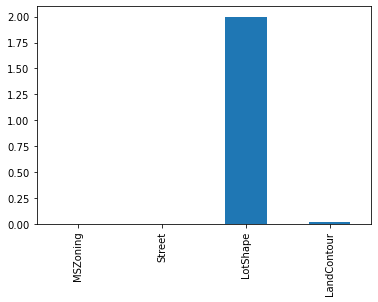

In [35]:
chi_values.plot.bar()

<AxesSubplot:>

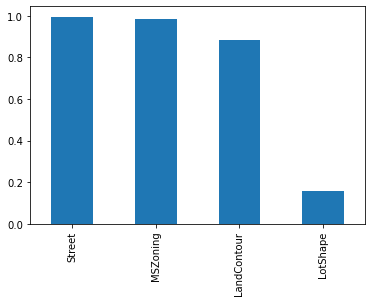

In [36]:
pvalues = pd.Series(f_score[1] , index = x_train.columns)
pvalues.sort_values(ascending = False, inplace = True )
pvalues.plot.bar()

* Lower the P value higher  the importance 
* if p-value > 0.05 , then lower the importance 

* WE should always select variables whose P value is less than 0.05 but here you can see that we have very few variable and their values are not less than  0.05 so in this case we can consider that value which has the lowest P value among all.
 

### Conclusion

* To choose the best features we can use the Chi_values and can choose the top 4 or 5 best features in the dataset 


### Second Example Chi-Square 

In [40]:
df = pd.read_csv('Loan Prediction Dataset.csv')
df = df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']]

df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y


In [41]:
df.isna().sum()

Gender            13
Married            3
Dependents        15
Education          0
Self_Employed     32
Credit_History    50
Property_Area      0
Loan_Status        0
dtype: int64

In [42]:
# fill null values
for col in df.columns:
    df[col] = df[col].fillna(df[col].mode()[0])
    
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y


In [44]:
df.isna().sum()

Gender            0
Married           0
Dependents        0
Education         0
Self_Employed     0
Credit_History    0
Property_Area     0
Loan_Status       0
dtype: int64

In [45]:
# label encoding

from sklearn.preprocessing import LabelEncoder

for col in df.columns:
    
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,1,2,1
1,1,1,1,0,0,1,0,0
2,1,1,0,0,1,1,2,1
3,1,1,0,1,0,1,2,1
4,1,0,0,0,0,1,2,1


In [46]:
from sklearn.feature_selection import chi2
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

In [48]:
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [49]:
chi_scores = chi2(x_train, y_train)

In [50]:
chi_scores

(array([1.04581802e-02, 1.56126431e+00, 1.85139339e+00, 1.20112745e+00,
        2.31743888e-02, 1.80320334e+01, 8.48698790e-03]),
 array([9.18546142e-01, 2.11480197e-01, 1.73621422e-01, 2.73096454e-01,
        8.79004456e-01, 2.17218923e-05, 9.26598845e-01]))

<AxesSubplot:>

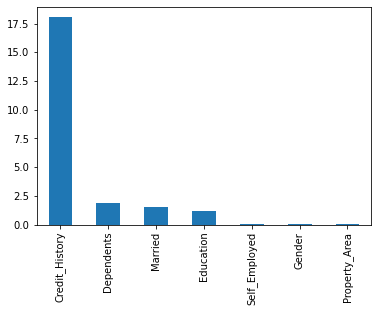

In [51]:
# higher the chi value, higher the importance

chi_values = pd.Series(chi_scores[0], index=X.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()

<AxesSubplot:>

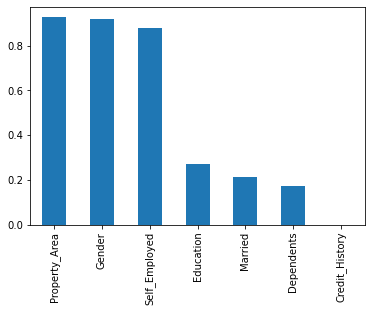

In [52]:
# if p-value > 0.5, lower the importance

p_values = pd.Series(chi_scores[1], index=X.columns)
p_values.sort_values(ascending=False, inplace=True)
p_values.plot.bar()

### 2. Variance Threshold


Removing Numerical features with low variance

* We simply compute the variance of each features, and we select the subset of features based on a user-specified threshold.
* We assume that features with a higher variance may contain more useful information.
* This feature selection algorithm looks only at the features (X) which are the independent variables, not the desired outputs (y), and can thus be used for unsupervised learning.
* As we are not taking the relationship between features variables or feature and target variables into account, which is one of the drawbacks of Variance Threshold filter method.
    
* It is applicable only on Numerical features.

#### If Variance Threshold = 0 (Remove Constant Features )
#### If Variance Threshold > 0 (Remove Quasi-Constant Features )


#### Features that are Constant. It can be of two types:

*  Constant Feature: Same value in all the records. 
*  Quasi Constant Feature: One of the values is dominant 99.9%.

1. Constant feature

In this step we will be removing the features which have constant features which are actually not important for solving the problem statement


### 2.1. Constant Value (Same value in all the records)


Feature Selection Method : Variance Threshold to remove the Constant Features

    Those features which contain constant values (only one value for all the outputs or target values) in the dataset.
    These features provide no information that allows ML models to predict the target.
    threshold = 0



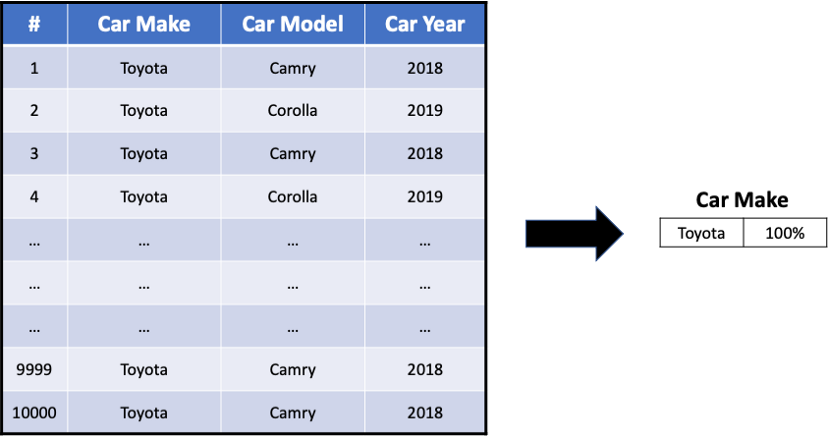



*


*



*  As shown in the example image, you only have Toyota as a value in Car Make for all the records in your data. Your machine learning model won’t learn anything insightful by keeping this feature in training. You are better off dropping this feature. Likewise, there can be many more such features, and you need a more automatic way of identifying this.


In [1]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

#### 1st Example  Variance Threshold

In [2]:
df = pd.read_csv('variance_threshold_data.csv')
df.head()

,length,width,size,decimal,weight,height
0,5.1,3.5,1.4,0.2,5,148
1,4.9,3.0,1.4,0.2,5,193
2,4.7,3.2,1.3,0.2,5,182
3,4.6,3.1,1.5,0.2,5,170
4,5.0,3.6,1.4,0.2,5,140


In [55]:
df.shape

(150, 6)

* In the above df we can see that the weight column has constant values which is 5.
* In order to verify how many distinct values are there lets run the below code

In [56]:
df["weight"].value_counts()

5    150
Name: weight, dtype: int64

* We got that the value is 5 and the total number of samples are 150 
* So there are not any other value in weight column except 5 which makes it a constant column/feature  and it has zero variance  

In [57]:
X = df.iloc[:, 0:5]
y = df.iloc[:, -1]

In [58]:
X.head(3)

,length,width,size,decimal,weight
0,5.1,3.5,1.4,0.2,5
1,4.9,3.0,1.4,0.2,5
2,4.7,3.2,1.3,0.2,5


In [59]:
y.head(3)

0    148
1    193
2    182
Name: height, dtype: int64

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

* The weight is a column with zero variance and this variable will not help in prediction 
* This will not give any predictive power to our model, so we need to drop this variable 
* Before we drop the column weight we will first check whether it's zero variance variable or not for that we'll import variance threshold 

In [69]:
selector = VarianceThreshold(threshold=0)

* threshold can take any value 
* threshold = 0 , means I wanna find all the variables whose variance is zero or less than zero.

In [70]:
selector

VarianceThreshold(threshold=0)

#### This feature selection/VarianceThreshold  algorithm looks only at the features (X), not the desired outputs (y), and can thus be used for unsupervised learning.

In [71]:
selector.fit(x_train)     # it will return us all the variables that are having variance of 0.4 or less than that.  

VarianceThreshold(threshold=0)

* get_support() will help us to check which variables are 0 variance and which are not 

In [72]:
 selector.get_support()

array([ True,  True,  True,  True, False])

* In the array output the True elements represent the columns which are not having zero or less than zero variance, so we don't have to remove those features.
* False element represent the column weight which is zero variance variable and needs to be removed.

In [73]:
x_train.head()

,length,width,size,decimal,weight
81,5.5,2.4,3.7,1.0,5
133,6.3,2.8,5.1,1.5,5
137,6.4,3.1,5.5,1.8,5
75,6.6,3.0,4.4,1.4,5
109,7.2,3.6,6.1,2.5,5


In [68]:
df.drop("weight", axis=1)

,length,width,size,decimal,height
0,5.1,3.5,1.4,0.2,148
1,4.9,3.0,1.4,0.2,193
2,4.7,3.2,1.3,0.2,182
3,4.6,3.1,1.5,0.2,170
4,5.0,3.6,1.4,0.2,140
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,192
146,6.3,2.5,5.0,1.9,140
147,6.5,3.0,5.2,2.0,149
148,6.2,3.4,5.4,2.3,189


### Conclusion

* The weight feature which was a constant column got dropped from our dataset and the reason was that it couldn't help in prediction of height.

#### Second Example Variance Threshold

In [74]:
data = pd.DataFrame({"A":[1,2,4,1,2,4], 
                    "B":[4,5,6,7,8,9], 
                    "C":[0,0,0,0,0,0],
                    "D":[1,1,1,1,1,1]}) 

In [75]:
data.head(4)

,A,B,C,D
0,1,4,0,1
1,2,5,0,1
2,4,6,0,1
3,1,7,0,1


In [76]:
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(data)

VarianceThreshold(threshold=0)

In [77]:
var_thres.get_support()

array([ True,  True, False, False])

In [78]:
data.columns[var_thres.get_support()]

Index(['A', 'B'], dtype='object')

In [79]:
# Finding the cosntant columns

constant_columns = [column for column in data.columns
                    if column not in data.columns[var_thres.get_support()]]

print(len(constant_columns))

2


In [80]:
for feature in constant_columns:
     print(feature)

C
D


In [81]:
data.drop(constant_columns,axis=1)

,A,B
0,1,4
1,2,5
2,4,6
3,1,7
4,2,8
5,4,9


### 3rd Example Variance Threshold

In [83]:
df = pd.read_csv('standard Customer Data.csv',nrows=10000)

In [84]:
df.shape

(10000, 371)

In [85]:
df.head(3)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [86]:
X=df.drop(labels=['TARGET'], axis=1)
y=df['TARGET']

In [87]:
from sklearn.model_selection import train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['TARGET'], axis=1),
    df['TARGET'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((7000, 370), (3000, 370))

In [88]:
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [89]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [90]:
### Finding non constant features
sum(var_thres.get_support())

284

In [91]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]

print(len(constant_columns))

86


In [92]:
for column in constant_columns:
    print(column)

ind_var2_0
ind_var2
ind_var13_medio_0
ind_var13_medio
ind_var18_0
ind_var18
ind_var27_0
ind_var28_0
ind_var28
ind_var27
ind_var34_0
ind_var34
ind_var41
ind_var46_0
ind_var46
num_var13_medio_0
num_var13_medio
num_var18_0
num_var18
num_var27_0
num_var28_0
num_var28
num_var27
num_var34_0
num_var34
num_var41
num_var46_0
num_var46
saldo_var13_medio
saldo_var18
saldo_var28
saldo_var27
saldo_var34
saldo_var41
saldo_var46
delta_imp_amort_var18_1y3
delta_imp_amort_var34_1y3
delta_imp_reemb_var17_1y3
delta_imp_reemb_var33_1y3
delta_imp_trasp_var17_out_1y3
delta_imp_trasp_var33_out_1y3
delta_num_reemb_var17_1y3
delta_num_reemb_var33_1y3
delta_num_trasp_var17_out_1y3
delta_num_trasp_var33_out_1y3
imp_amort_var18_hace3
imp_amort_var18_ult1
imp_amort_var34_hace3
imp_amort_var34_ult1
imp_var7_emit_ult1
imp_reemb_var13_hace3
imp_reemb_var17_hace3
imp_reemb_var17_ult1
imp_reemb_var33_hace3
imp_reemb_var33_ult1
imp_trasp_var17_in_hace3
imp_trasp_var17_out_hace3
imp_trasp_var17_out_ult1
imp_trasp_var33_i

In [94]:
# Dropping the constant columns
X_train.drop(constant_columns,axis=1)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
7681,15431,2,42,840.0,4477.02,4989.54,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37491.21
9031,18181,2,31,0.0,52.32,52.32,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106685.94
3691,7411,2,51,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66144.66
202,407,2,36,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92121.36
5625,11280,2,23,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74650.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,18564,2,33,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117547.89
4859,9723,2,24,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71050.83
3264,6557,2,24,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,141069.33
9845,19796,2,38,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86412.15


### 2.2.  Quasi Constant (One of the values is dominant ~99% records)



Feature Selection Method : Variance Threshold to remove the Quasi-Constant Features

* Features that are almost constant. In other words, these features have the same values for a very large subset of the outputs.
* Such features are not very useful for making predictions. There is no rule as to what should be the threshold for the variance of quasi-constant features. However, as a rule of thumb, remove those quasi-constant features that have more than 99% similar values for the output observations.
* We will create a quasi-constant filter with the help of VarianceThreshold function. However, instead of passing 0 as the value for the threshold parameter, we will pass 0.01, which means that if the variance of the values in a column is less than 0.01, remove that column. In other words, remove feature column where approximately 99% of the values are similar.

* threshold = 0.01

#####  If Variance Threshold = 0 (Remove Constant Features )
##### If Variance Threshold > 0 (Remove Quasi-Constant Features )





*

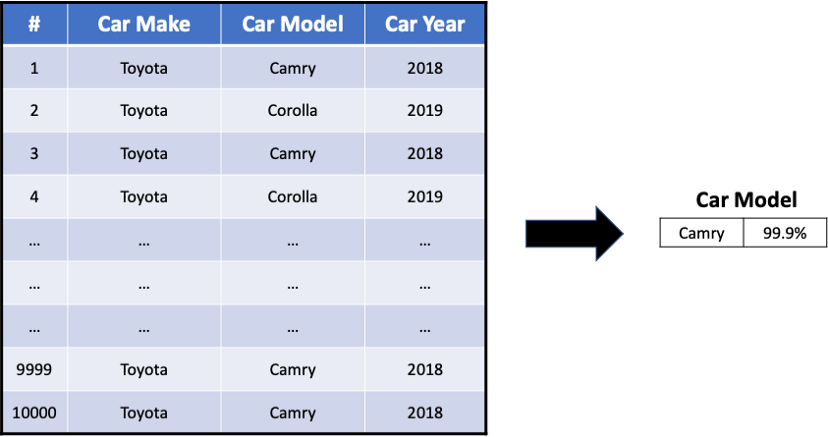




*

* As shown in the example image — in your data, ‘Camry’ accounts for 99.9% of records. Your machine learning model won’t learn anything insightful by keeping this feature in training. Or worse, your model can learn from the fringe cases and cause overfitting. You are better off dropping this feature. Likewise, there can be many more such features, and you need a more automatic way of identifying this.


In [68]:
df = pd.read_csv('train data credit card.csv',nrows = 10000)
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [69]:
df.nunique()

ID                     10000
Gender                     2
Age                       62
Region_Code               35
Occupation                 4
Channel_Code               4
Vintage                   65
Credit_Product             2
Avg_Account_Balance     9657
Is_Active                  2
Is_Lead                    2
dtype: int64

In [70]:
df.isna().sum()

ID                        0
Gender                    0
Age                       0
Region_Code               0
Occupation                0
Channel_Code              0
Vintage                   0
Credit_Product         1163
Avg_Account_Balance       0
Is_Active                 0
Is_Lead                   0
dtype: int64

In [71]:
df.fillna('None', inplace = True)

In [72]:
X = df.drop(["ID","Is_Lead"],axis=1)
y = df["Is_Lead"]

In [73]:
X.head(3)

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,Female,73,RG268,Other,X3,43,No,1045696,No
1,Female,30,RG277,Salaried,X1,32,No,581988,No
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes


In [74]:
y.head(3)

0    0
1    0
2    0
Name: Is_Lead, dtype: int64

In [75]:
ord_enc = OrdinalEncoder()
  
# Transform the data
X[["Gender","Region_Code","Occupation","Channel_Code","Credit_Product","Is_Active"]] = ord_enc.fit_transform(X[["Gender","Region_Code","Occupation","Channel_Code","Credit_Product","Is_Active"]])

In [76]:
# checking the variance of each feature
X.var()

Gender                 2.471625e-01
Age                    2.218029e+02
Region_Code            1.181031e+02
Occupation             7.246702e-01
Channel_Code           7.858277e-01
Vintage                1.044126e+03
Credit_Product         8.029538e-01
Avg_Account_Balance    7.423200e+11
Is_Active              2.381428e-01
dtype: float64

### Defining and Fitting Threshold
For quasi-constant features, that have the same value for a very large subset, using threshold as 0.01 would mean dropping the column where 99% of the values are similar.

In [67]:
var_thr = VarianceThreshold(threshold = 0.25) #Removing both constant and quasi-constant
var_thr.fit(X)

var_thr.get_support()

array([False,  True,  True,  True,  True,  True,  True,  True, False])

####  OUTPUT:

    True : Low Variance
    False: High Variance

In [49]:
sum(var_thr.get_support())   #Sum for High Variance Columns

7

### Picking Up the low Variance Columns:
As per my above code, i am dropping columns that are 75% or more similar (you can keep any value you prefer)

In [50]:
concol = [column for column in X.columns 
          if column not in X.columns[var_thr.get_support()]]

for features in concol:
    print(features)

Gender
Is_Active


### Dropping Low Variance Columns:

In [51]:
X.drop(concol,axis=1)

,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance
0,73,18.0,1.0,2.0,43,0.0,1045696
1,30,27.0,2.0,0.0,32,0.0,581988
2,56,18.0,3.0,2.0,26,0.0,1484315
3,34,20.0,2.0,0.0,19,0.0,470454
4,30,32.0,2.0,0.0,33,0.0,886787
...,...,...,...,...,...,...,...
9995,57,4.0,3.0,2.0,91,1.0,1280914
9996,30,33.0,2.0,0.0,19,0.0,717188
9997,45,30.0,3.0,1.0,14,2.0,733671
9998,31,22.0,2.0,0.0,15,0.0,670695


In [52]:
X.columns

Index(['Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code', 'Vintage',
       'Credit_Product', 'Avg_Account_Balance', 'Is_Active'],
      dtype='object')

This is how we can see which are the columns that have high variance and thus contribute in better models. Don't forget to convert the columns dtype to integer or flow before applying thresold.

Once you identify your low variance columns, you can always reverse the encoding and continue your journey :)


### 3. Correlation Matrix (Numerical Attributes)


A correlation matrix is simply a table which displays the correlation coefficients for different variables.

* Correlational Matrix is useful when we are dealing with numerical attributes 
* This is helpful if you are working with regression algorithm cuz the target variable is a contineous variable and it will be a numerical attribute.
* Even the input attributes are also numerical means it will be able to calculate the scores for the attributes and we can compare and select the top features. 

In [104]:
df = pd.read_csv('bike dataset.csv')

In [105]:
df.head(4)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13


<AxesSubplot:>

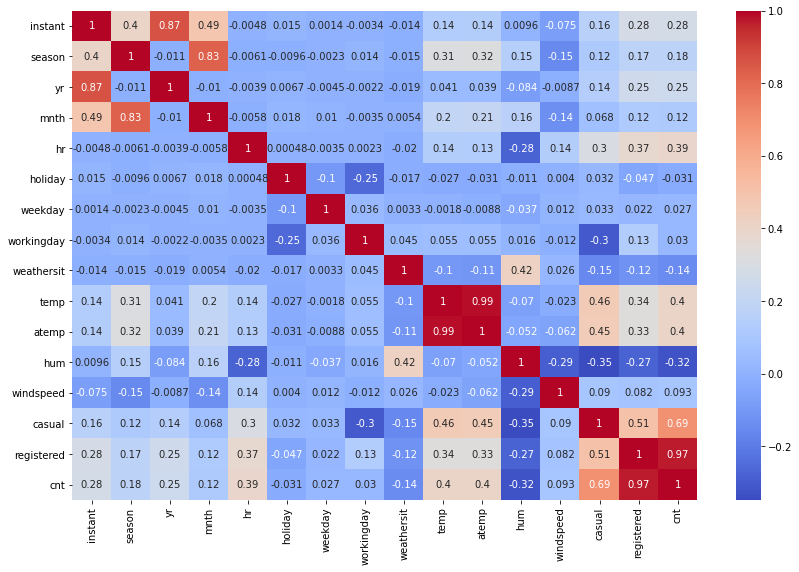

In [106]:
# display correlation matrix in heatmap
corr = df.corr()
plt.figure(figsize=(14,9))
sns.heatmap(corr, annot=True, cmap='coolwarm')

#### From the above plot we can conclude that:

   *  Any variable in the range of [0.4 - 1 ] can help us in predicting the target variable and it's important

1. There's a high correlation between the target 'cnt' variable and casual, registered variables. 
    So these two variables have high correlation and  can help us to predict the target variable.
    
2. Temp and hr variables also can help us in prediction.
3. workingday and holiday has very low correlation, so these 2 varaibles don't affect the target variable, so it's not that much important.

### In correlation matrix we have 2 ways to select our features.

1. select the top features which have high corraltion with the target variable.

2. Eliminate some of the features in the input attributes. 

e.g. 

* whenever you face with a number more than 0.7 or 0.8  then you can drop one of those values but not both, because both values represent similar pattern. let's see the following values for better understanding.   

* atemp and temp has 0.99 correlation which is highly positive correlation, if atemp increases temp also increases.
* year 'yr' is highly correlated with instant so we can remove one of them.
* month 'mnth' is highlt correlated with season so we can remove one of them. 

* Removing these variables won't impact that much severely but 

In [107]:
X = df.drop("cnt",axis=1)   #Feature Matrix
y = df["cnt"] 

In [108]:
X.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27


In [109]:
y.head(3)

0    16
1    40
2    32
Name: cnt, dtype: int64

In [110]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((12165, 16), (5214, 16))

In [111]:
corr = X_train.corr()
corr

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
instant,1.000000,0.406342,0.866809,0.492305,-0.008954,0.022642,-0.001372,0.001221,-0.008621,0.132309,0.133732,0.012167,-0.070945,0.156598,0.277877
season,0.406342,1.000000,-0.004679,0.826803,-0.011831,-0.006507,-0.011276,0.016272,-0.017910,0.319737,0.326234,0.145679,-0.142775,0.132017,0.179896
yr,0.866809,-0.004679,1.000000,-0.005267,-0.002887,0.012869,-0.005541,0.001033,-0.013392,0.034680,0.033622,-0.079632,-0.008991,0.136772,0.247313
mnth,0.492305,0.826803,-0.005267,1.000000,-0.015399,0.024236,0.007168,0.000137,0.006638,0.205316,0.210564,0.163383,-0.128246,0.075920,0.126273
hr,-0.008954,-0.011831,-0.002887,-0.015399,1.000000,-0.000848,-0.014452,-0.000933,-0.018132,0.143867,0.140835,-0.279156,0.143334,0.303310,0.374755
holiday,0.022642,-0.006507,0.012869,0.024236,-0.000848,1.000000,-0.102924,-0.257811,-0.022009,-0.023884,-0.026845,-0.011946,-0.002679,0.036796,-0.048350
weekday,-0.001372,-0.011276,-0.005541,0.007168,-0.014452,-0.102924,1.000000,0.033114,-0.002332,-0.006601,-0.012772,-0.039274,0.009170,0.032650,0.017751
workingday,0.001221,0.016272,0.001033,0.000137,-0.000933,-0.257811,0.033114,1.000000,0.045733,0.047969,0.046021,0.025508,-0.011460,-0.311012,0.129120
weathersit,-0.008621,-0.017910,-0.013392,0.006638,-0.018132,-0.022009,-0.002332,0.045733,1.000000,-0.103030,-0.105332,0.415240,0.029410,-0.148261,-0.121773
temp,0.132309,0.319737,0.034680,0.205316,0.143867,-0.023884,-0.006601,0.047969,-0.103030,1.000000,0.987352,-0.068842,-0.021102,0.456828,0.331619


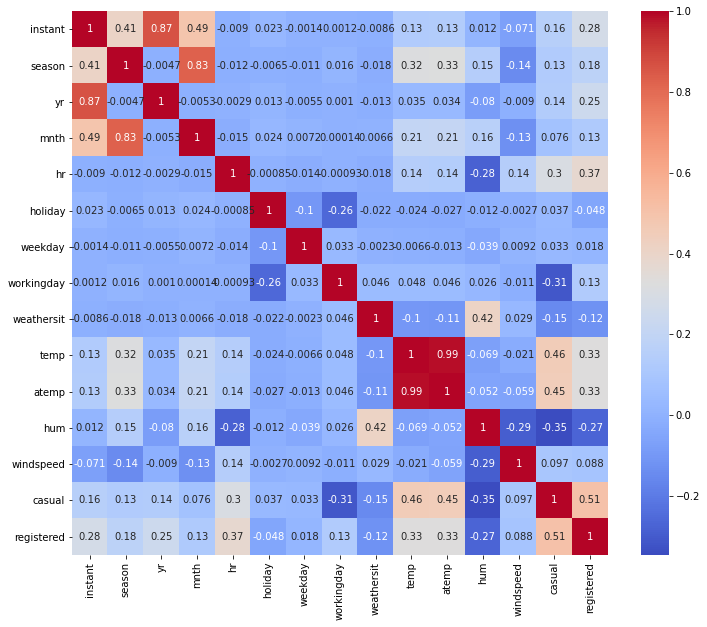

In [112]:
# display correlation matrix in heatmap
#Using Pearson Correlation

plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap='coolwarm')  # cmap = 'coolwarm'
plt.show()

In [113]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [114]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

3

In [115]:
corr_features

{'atemp', 'mnth', 'yr'}

In [116]:
# Dropping the features 

X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,instant,dteday,season,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered
3439,3440,2011-05-28,2,5,0,6,0,1,0.56,0.88,0.2239,4,3
6542,6543,2011-10-05,4,4,0,3,1,1,0.44,0.88,0.0000,1,4
15470,15471,2012-10-11,4,19,0,4,1,1,0.44,0.51,0.1343,81,662
9851,9852,2012-02-20,1,11,1,1,0,1,0.26,0.48,0.3582,45,163
12640,12641,2012-06-15,2,21,0,5,1,1,0.66,0.50,0.1045,83,250
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13321,13322,2012-07-14,3,6,0,6,0,2,0.64,0.78,0.0896,6,29
5252,5253,2011-08-11,3,18,0,4,1,1,0.78,0.29,0.0896,74,497
12510,12511,2012-06-10,2,11,0,0,0,1,0.76,0.45,0.0896,184,315
6842,6843,2011-10-17,4,16,0,1,1,1,0.58,0.56,0.2537,64,238
